In [687]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [688]:
import pandas_datareader
import datetime
import pandas_datareader.data as web
from statsmodels.tsa.seasonal import seasonal_decompose

In [689]:
print(pandas_datareader.__version__)

0.8.1


# Getting the Data 

In [690]:
start = datetime.datetime(2018,11,1)
end = datetime.datetime(2019,11,1)

In [691]:
my_stocks =['COF', 'GLD', 'RY', 'AAPL', 'FFH.TO', 'ACB', 'TTWO', 'TEAM', 'VGRO.TO'] 

In [692]:
PF = web.DataReader(my_stocks,'yahoo',start,end)

In [693]:
COF= web.DataReader('COF', 'yahoo',start,end)
GLD= web.DataReader('GLD', 'yahoo',start,end)
RY= web.DataReader('RY', 'yahoo',start,end)
AAPL= web.DataReader('AAPL', 'yahoo',start,end)
FFH= web.DataReader('FFH.TO', 'yahoo',start,end)
ACB= web.DataReader('ACB', 'yahoo',start,end)
TTWO= web.DataReader('TTWO', 'yahoo',start,end)
TEAM= web.DataReader('TEAM', 'yahoo',start,end)
ENB= web.DataReader('ENB', 'yahoo',start,end)
#VGRO.TO= web.DataReader('VGRO.TO', 'yahoo',start,end)

# VISUALIZING DATA AND STOCK PRICE

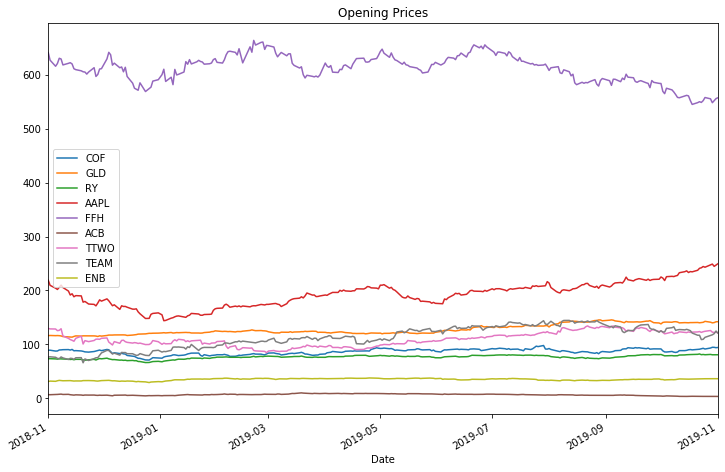

In [694]:
#Opening Price
COF['Open'].plot(label='COF', figsize=(12,8), title='Opening Prices')
GLD['Open'].plot(label='GLD')
RY['Open'].plot(label='RY')
AAPL['Open'].plot(label='AAPL')
FFH['Open'].plot(label='FFH')
ACB['Open'].plot(label='ACB')
TTWO['Open'].plot(label='TTWO')
TEAM['Open'].plot(label='TEAM')
ENB['Open'].plot(label='ENB')
plt.legend();

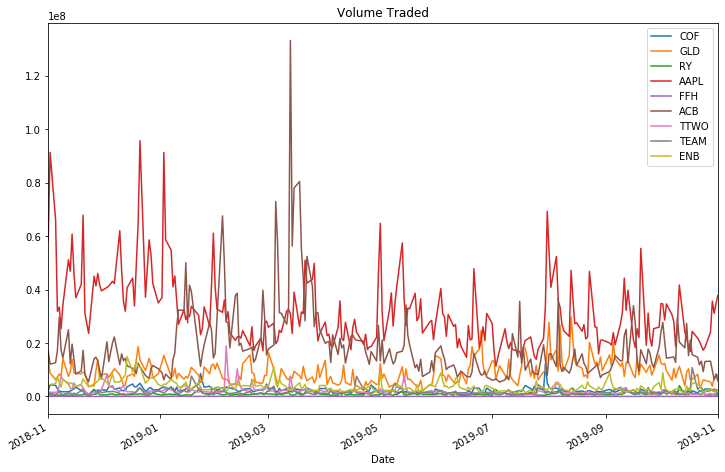

In [161]:
#Volume Traded
COF['Volume'].plot(label='COF', figsize=(12,8), title='Volume Traded')
GLD['Volume'].plot(label='GLD')
RY['Volume'].plot(label='RY')
AAPL['Volume'].plot(label='AAPL')
FFH['Volume'].plot(label='FFH')
ACB['Volume'].plot(label='ACB')
TTWO['Volume'].plot(label='TTWO')
TEAM['Volume'].plot(label='TEAM')
ENB['Volume'].plot(label='ENB')
plt.legend();

In [162]:
#total traded ADDING TO DATASET
COF['Total Traded']= COF['Open']*COF['Volume']
GLD['Total Traded']= GLD['Open']*GLD['Volume']
RY['Total Traded']= RY['Open']*RY['Volume']
AAPL['Total Traded']= AAPL['Open']*AAPL['Volume']
FFH['Total Traded']= FFH['Open']*FFH['Volume']
ACB['Total Traded']= ACB['Open']*ACB['Volume']
TTWO['Total Traded']= TTWO['Open']*TTWO['Volume']
TEAM['Total Traded']= TEAM['Open']*TEAM['Volume']
ENB['Total Traded']= ENB['Open']*ENB['Volume']

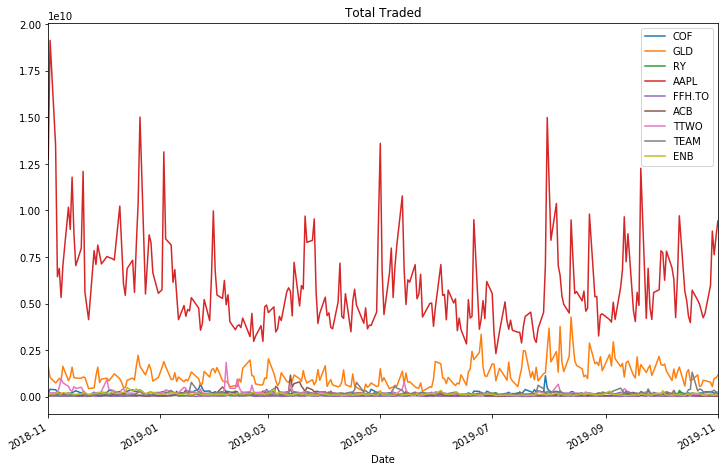

In [163]:
#total Traded
COF['Total Traded'].plot(label='COF', figsize=(12,8), title='Total Traded')
GLD['Total Traded'].plot(label='GLD')
RY['Total Traded'].plot(label='RY')
AAPL['Total Traded'].plot(label='AAPL')
FFH['Total Traded'].plot(label='FFH.TO')
ACB['Total Traded'].plot(label='ACB')
TTWO['Total Traded'].plot(label='TTWO')
TEAM['Total Traded'].plot(label='TEAM')
ENB['Total Traded'].plot(label='ENB')
plt.legend();

In [95]:
#IDENTIFY HIGHEST VOLUME POINT 
AAPL['Volume'].argmax()

/Users/mk/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  """Entry point for launching an IPython kernel.


Timestamp('2018-12-21 00:00:00')

In [101]:
#IDENTIFY HIGHEST VOLUME POINT 
AAPL['Total Traded'].argmax()

/Users/mk/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  


Timestamp('2018-11-02 00:00:00')

# STOCK DATASETS, PRICE, AND TRENDS

In [107]:
COF.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,MA50,MA200,MA90
Date,,,,,,,,,,
2018-11-01,89.860001,88.769997,89.309998,89.300003,2128800.0,87.318451,1.901231e+08,NaN,NaN,NaN
2018-11-02,89.849998,86.860001,89.300003,87.269997,4372900.0,85.333481,3.905000e+08,NaN,NaN,NaN
2018-11-05,88.610001,87.690002,87.690002,88.050003,4166800.0,86.096184,3.653867e+08,NaN,NaN,NaN
2018-11-06,89.440002,87.650002,87.849998,89.180000,2894800.0,87.201096,2.543082e+08,NaN,NaN,NaN
2018-11-07,90.690002,88.580002,89.739998,90.540001,2045400.0,88.530930,1.835542e+08,NaN,NaN,NaN


In [108]:
COF.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
High,252.0,8.760833e+01,5.082109e+00,7.289000e+01,8.393000e+01,8.859000e+01,9.157000e+01,9.862000e+01
Low,252.0,8.584143e+01,5.156092e+00,6.990000e+01,8.190500e+01,8.698500e+01,8.994750e+01,9.659000e+01
Open,252.0,8.672405e+01,5.135429e+00,7.105000e+01,8.298750e+01,8.781000e+01,9.070250e+01,9.803000e+01
Close,252.0,8.675770e+01,5.160643e+00,7.078000e+01,8.295000e+01,8.781000e+01,9.066500e+01,9.808000e+01
Volume,252.0,2.393763e+06,1.104655e+06,7.230000e+05,1.758775e+06,2.181800e+06,2.813625e+06,1.226820e+07
Adj Close,252.0,8.582026e+01,5.361525e+00,6.951651e+01,8.188371e+01,8.674048e+01,8.982384e+01,9.725050e+01
Total Traded,252.0,2.061427e+08,9.385003e+07,6.199725e+07,1.526282e+08,1.904076e+08,2.407741e+08,1.122295e+09
MA50,203.0,8.632776e+01,4.014091e+00,7.916600e+01,8.206360e+01,8.837200e+01,8.963780e+01,9.101100e+01
MA200,53.0,8.635206e+01,6.141034e-01,8.572160e+01,8.586680e+01,8.608915e+01,8.681925e+01,8.766520e+01
MA90,163.0,8.670082e+01,3.343574e+00,8.113733e+01,8.357633e+01,8.797900e+01,8.976600e+01,9.010311e+01


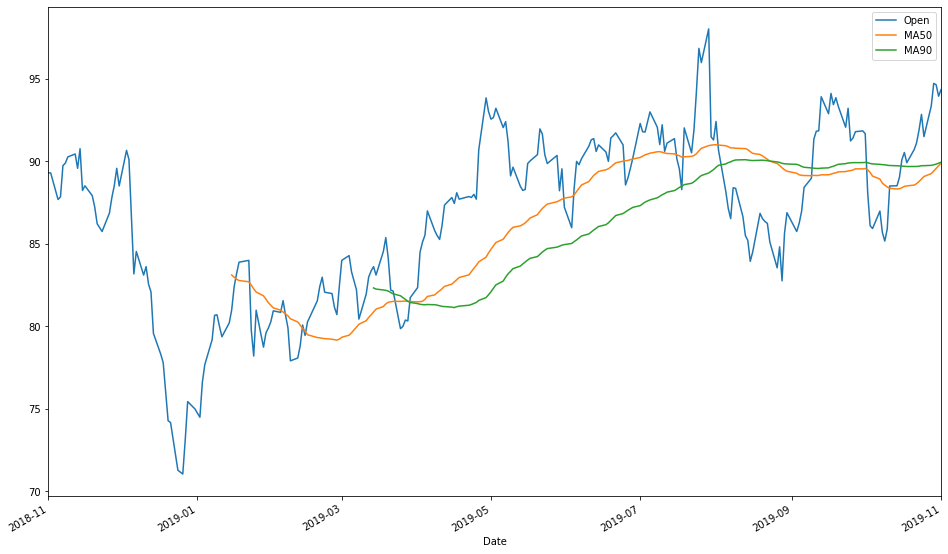

In [109]:
COF['MA50']= COF['Open'].rolling(50).mean()
COF['MA90']= COF['Open'].rolling(90).mean()
COF[['Open','MA50','MA90']].plot(figsize=(16,10))

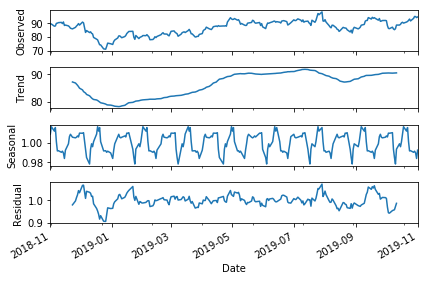

In [110]:
result = seasonal_decompose(COF['Open'], model='multiplicative', freq=30)
fig = result.plot()

In [111]:
GLD.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded
Date,,,,,,,
2018-11-01,117.070000,116.180000,116.330002,116.629997,13662900,116.629997,1.589405e+09
2018-11-02,116.980003,116.389999,116.610001,116.650002,8796900,116.650002,1.025807e+09
2018-11-05,116.669998,116.230003,116.279999,116.370003,6291500,116.370003,7.315756e+08
2018-11-06,116.529999,115.739998,116.440002,116.040001,7270800,116.040001,8.466120e+08
2018-11-07,116.349998,115.900002,116.260002,116.029999,8392100,116.029999,9.756656e+08


In [112]:
GLD.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
High,252.0,1.284639e+02,9.503057e+00,1.139300e+02,1.215200e+02,1.243750e+02,1.387375e+02,1.468200e+02
Low,252.0,1.275134e+02,9.165291e+00,1.134200e+02,1.208575e+02,1.236550e+02,1.372375e+02,1.455000e+02
Open,252.0,1.279841e+02,9.345714e+00,1.135300e+02,1.210825e+02,1.240200e+02,1.379650e+02,1.455400e+02
Close,252.0,1.280021e+02,9.343500e+00,1.136600e+02,1.212075e+02,1.239850e+02,1.380600e+02,1.466600e+02
Volume,252.0,9.172733e+06,4.398886e+06,2.250900e+06,6.269850e+06,8.092300e+06,1.161975e+07,2.984280e+07
Adj Close,252.0,1.280021e+02,9.343500e+00,1.136600e+02,1.212075e+02,1.239850e+02,1.380600e+02,1.466600e+02
Total Traded,252.0,1.187575e+09,6.159725e+08,2.711434e+08,7.766656e+08,1.020441e+09,1.504666e+09,4.272594e+09


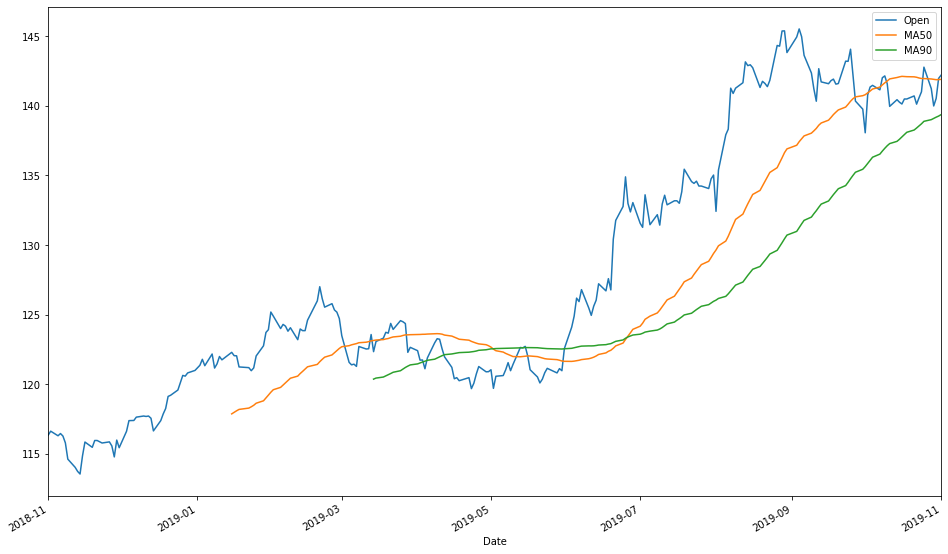

In [115]:
GLD['MA50']= GLD['Open'].rolling(50).mean()
GLD['MA90']= GLD['Open'].rolling(90).mean()
GLD[['Open','MA50','MA90']].plot(figsize=(16,10))

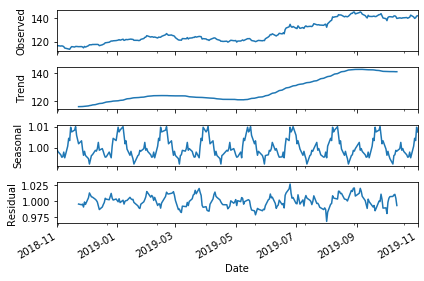

In [117]:
result = seasonal_decompose(GLD['Open'], model='multiplicative', freq=30)
fig = result.plot()

In [58]:
RY.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-11-01,81.169998,80.690002,80.879997,81.150002,465700,81.150002


In [77]:
RY.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
High,252.0,77.022103,3.292855,67.320000,74.992500,77.605000,79.594997,8.258000e+01
Low,252.0,76.183889,3.453187,65.760002,74.172503,76.864998,78.822502,8.190000e+01
Open,252.0,76.594524,3.359201,66.400002,74.567501,77.275002,79.172499,8.234000e+01
Close,252.0,76.634881,3.392251,66.360001,74.655003,77.264999,79.285000,8.227000e+01
Volume,252.0,892771.825397,491588.777025,369500.000000,605750.000000,729600.000000,991225.000000,4.100700e+06
Adj Close,252.0,74.875200,4.015842,63.615669,73.304270,75.418350,77.982603,8.146467e+01


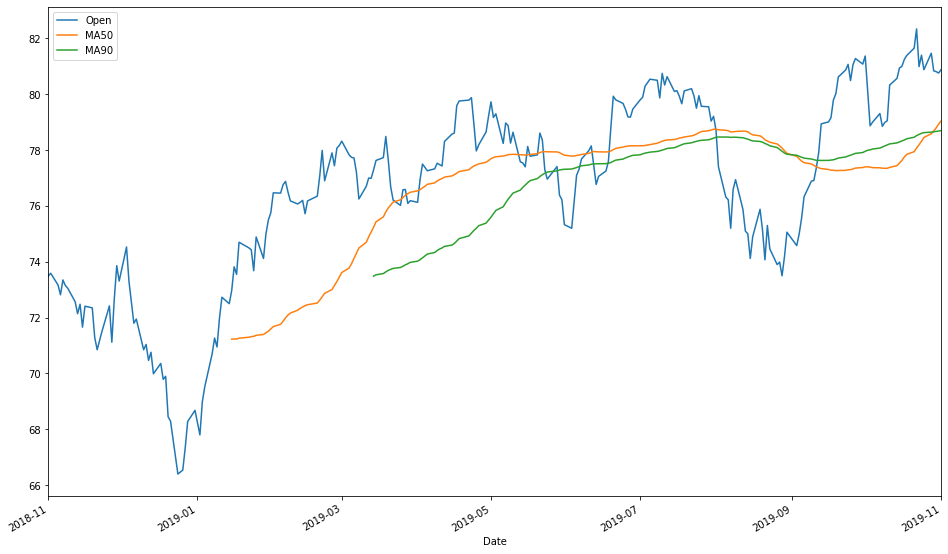

In [118]:
RY['MA50']= RY['Open'].rolling(50).mean()
RY['MA90']= RY['Open'].rolling(90).mean()
RY[['Open','MA50','MA90']].plot(figsize=(16,10))

In [78]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-11-01,222.360001,216.809998,219.050003,222.220001,58323200.0,218.169342
2018-11-02,213.649994,205.429993,209.550003,207.479996,91328700.0,203.697998
2018-11-05,204.389999,198.169998,204.300003,201.589996,66163700.0,197.915375
2018-11-06,204.720001,201.690002,201.919998,203.770004,31882900.0,200.055649
2018-11-07,210.059998,204.130005,205.970001,209.949997,33424400.0,206.122986


In [79]:
AAPL.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
High,252.0,1.955585e+02,2.338201e+01,1.457200e+02,1.759675e+02,1.990550e+02,2.092600e+02,2.559300e+02
Low,252.0,1.917150e+02,2.335160e+01,1.420000e+02,1.737475e+02,1.939300e+02,2.057375e+02,2.491600e+02
Open,252.0,1.935844e+02,2.331212e+01,1.439800e+02,1.748725e+02,1.964350e+02,2.077175e+02,2.495400e+02
Close,252.0,1.937138e+02,2.343531e+01,1.421900e+02,1.748325e+02,1.970000e+02,2.079125e+02,2.558200e+02
Volume,252.0,3.141363e+07,1.349188e+07,1.136200e+07,2.178268e+07,2.784870e+07,3.664262e+07,9.574460e+07
Adj Close,252.0,1.920501e+02,2.388604e+01,1.400852e+02,1.729338e+02,1.952916e+02,2.059422e+02,2.550543e+02


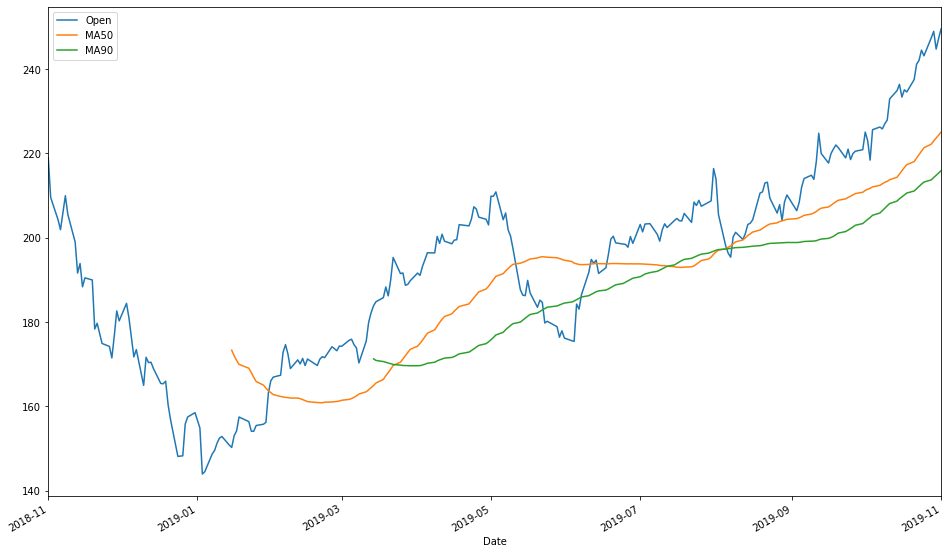

In [119]:
AAPL['MA50']= AAPL['Open'].rolling(50).mean()
AAPL['MA90']= AAPL['Open'].rolling(90).mean()
AAPL[['Open','MA50','MA90']].plot(figsize=(16,10))

In [80]:
FFH.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-11-01,644.169983,625.010010,641.070007,627.000000,35800.0,613.833618
2018-11-02,627.000000,610.000000,627.000000,612.500000,56700.0,599.638123
2018-11-05,627.940002,615.000000,615.760010,621.260010,46200.0,608.214172
2018-11-06,630.799988,620.880005,620.880005,630.000000,41800.0,616.770630
2018-11-07,635.239990,624.000000,630.530029,629.390015,51900.0,616.173462


In [81]:
FFH.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
High,252.0,617.173175,26.224111,550.659973,600.634995,620.250000,635.419998,667.229980
Low,252.0,605.838969,25.702768,542.700012,588.357483,610.885010,623.095001,654.809998
Open,252.0,611.420796,26.102210,544.989990,593.947510,617.024994,629.917511,663.700012
Close,252.0,611.001113,26.322710,545.030029,594.067520,615.114990,629.542511,665.159973
Volume,252.0,43019.047619,22472.852908,8800.000000,28300.000000,37150.000000,51975.000000,144700.000000
Adj Close,252.0,608.373508,27.224114,545.030029,588.590927,611.850006,626.827499,665.159973


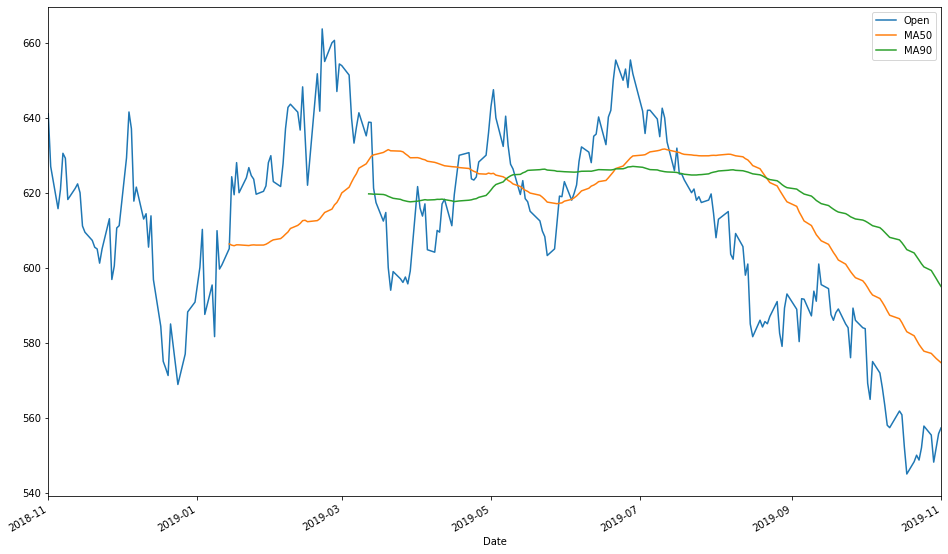

In [120]:
FFH['MA50']= FFH['Open'].rolling(50).mean()
FFH['MA90']= FFH['Open'].rolling(90).mean()
FFH[['Open','MA50','MA90']].plot(figsize=(16,10))

In [82]:
ACB.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-11-01,7.10,6.60,6.94,6.73,16903200,6.73
2018-11-02,7.02,6.67,6.80,7.02,12111000,7.02
2018-11-05,7.35,6.85,7.18,7.35,12628900,7.35
2018-11-06,7.68,7.11,7.34,7.40,17263600,7.40
2018-11-07,8.12,7.30,7.70,8.08,29610000,8.08


In [83]:
ACB.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
High,252.0,6.958766e+00,1.588911e+00,3.64,5.877500e+00,7.100000e+00,8.070000e+00,1.032000e+01
Low,252.0,6.606671e+00,1.562224e+00,3.40,5.515000e+00,6.665000e+00,7.612500e+00,9.840000e+00
Open,252.0,6.799774e+00,1.572289e+00,3.55,5.730000e+00,6.910000e+00,7.882500e+00,1.020000e+01
Close,252.0,6.783968e+00,1.582113e+00,3.51,5.677500e+00,6.930000e+00,7.875000e+00,9.960000e+00
Volume,252.0,1.854457e+07,1.413084e+07,5388900.00,1.051690e+07,1.449905e+07,2.075892e+07,1.332472e+08
Adj Close,252.0,6.783968e+00,1.582113e+00,3.51,5.677500e+00,6.930000e+00,7.875000e+00,9.960000e+00


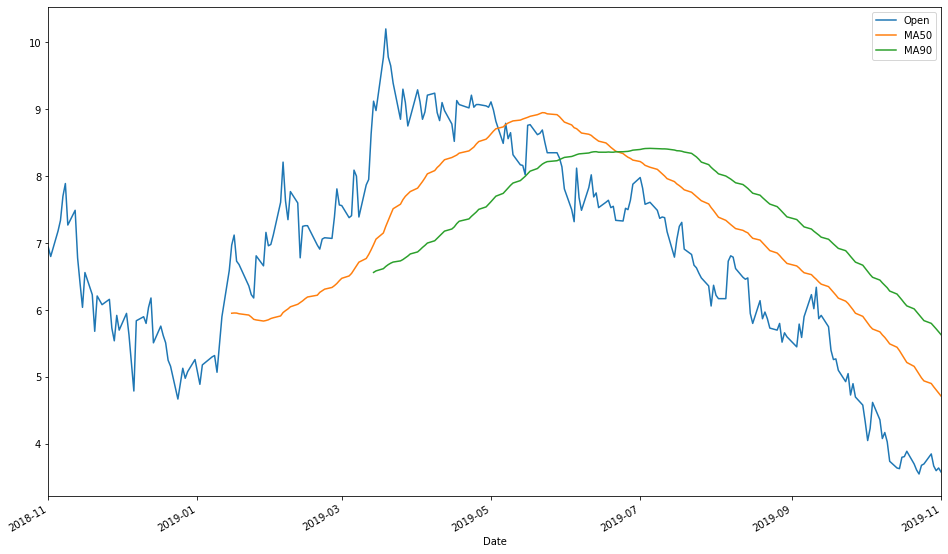

In [121]:
ACB['MA50']= ACB['Open'].rolling(50).mean()
ACB['MA90']= ACB['Open'].rolling(90).mean()
ACB[['Open','MA50','MA90']].plot(figsize=(16,10))

In [62]:
TTWO.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-11-01,121.739998,116.800003,121.279999,116.900002,1984300,116.900002


In [84]:
TTWO.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
High,252.0,1.114485e+02,1.306046e+01,87.570000,1.021200e+02,1.100900e+02,1.235275e+02,1.357000e+02
Low,252.0,1.080625e+02,1.297771e+01,84.410004,9.854500e+01,1.062250e+02,1.202600e+02,1.322800e+02
Open,252.0,1.098871e+02,1.315325e+01,84.709999,9.986500e+01,1.080400e+02,1.220825e+02,1.343400e+02
Close,252.0,1.097989e+02,1.298120e+01,84.629997,9.986250e+01,1.080350e+02,1.219000e+02,1.342100e+02
Volume,252.0,2.123010e+06,1.775021e+06,641600.000000,1.225325e+06,1.612650e+06,2.293750e+06,1.894500e+07
Adj Close,252.0,1.097989e+02,1.298120e+01,84.629997,9.986250e+01,1.080350e+02,1.219000e+02,1.342100e+02


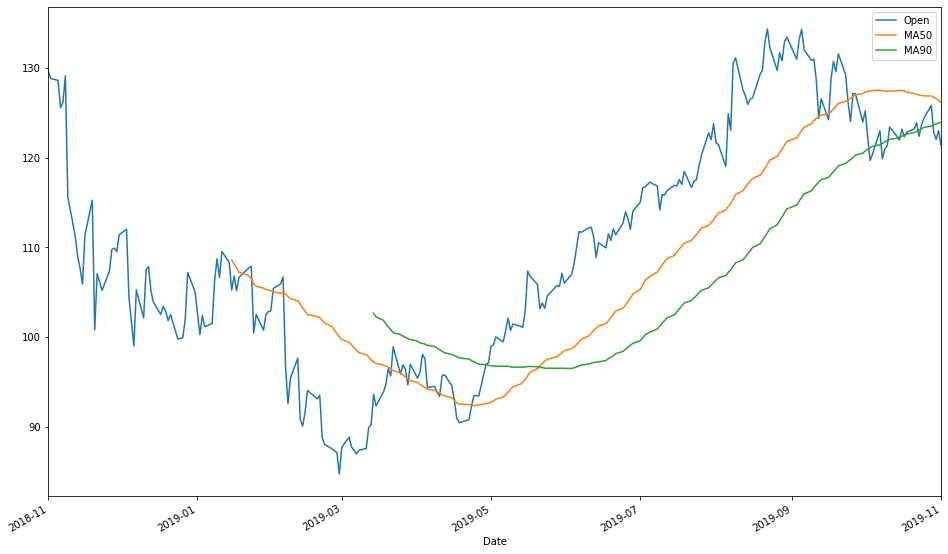

In [122]:
TTWO['MA50']= TTWO['Open'].rolling(50).mean()
TTWO['MA90']= TTWO['Open'].rolling(90).mean()
TTWO[['Open','MA50','MA90']].plot(figsize=(16,10))

In [63]:
TEAM.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-11-01,122.68,119.829002,121.190002,122.360001,865800,122.360001


In [85]:
TEAM.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
High,252.0,1.156264e+02,2.075687e+01,70.570000,1.034995e+02,1.159400e+02,1.329025e+02,1.498000e+02
Low,252.0,1.113328e+02,2.042374e+01,65.169998,9.959500e+01,1.119650e+02,1.283488e+02,1.425000e+02
Open,252.0,1.134765e+02,2.064781e+01,66.040001,1.005400e+02,1.145650e+02,1.308300e+02,1.445600e+02
Close,252.0,1.136590e+02,2.053360e+01,69.309998,1.021200e+02,1.141550e+02,1.304300e+02,1.467000e+02
Volume,252.0,1.626804e+06,1.088993e+06,363900.000000,1.021725e+06,1.316800e+06,1.849025e+06,1.081460e+07
Adj Close,252.0,1.136590e+02,2.053360e+01,69.309998,1.021200e+02,1.141550e+02,1.304300e+02,1.467000e+02


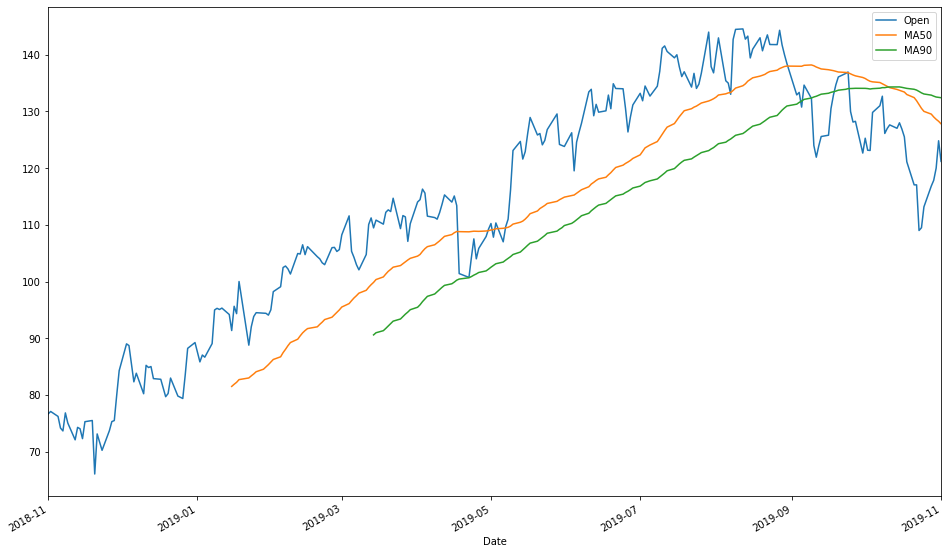

In [123]:
TEAM['MA50']= TEAM['Open'].rolling(50).mean()
TEAM['MA90']= TEAM['Open'].rolling(90).mean()
TEAM[['Open','MA50','MA90']].plot(figsize=(16,10))

In [164]:
ENB.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded
Date,,,,,,,
2018-11-01,31.700001,31.090000,31.290001,31.670000,4197300.0,28.720997,1.313335e+08
2018-11-02,32.009998,30.950001,32.009998,31.420000,4472500.0,28.494274,1.431647e+08
2018-11-05,32.439999,31.420000,31.629999,32.320000,4791000.0,29.310471,1.515393e+08
2018-11-06,33.180000,32.599998,32.650002,33.119999,7229100.0,30.035978,2.360301e+08
2018-11-07,33.669998,32.759998,33.380001,33.169998,5172100.0,30.081320,1.726447e+08


In [165]:
ENB.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
High,252.0,3.537500e+01,1.794404e+00,3.028000e+01,3.397750e+01,3.584500e+01,3.687000e+01,3.804000e+01
Low,252.0,3.480171e+01,1.924862e+00,2.882000e+01,3.333750e+01,3.527000e+01,3.637500e+01,3.754000e+01
Open,252.0,3.510429e+01,1.863427e+00,2.934000e+01,3.367000e+01,3.561500e+01,3.659750e+01,3.786000e+01
Close,252.0,3.509933e+01,1.874762e+00,2.922000e+01,3.359000e+01,3.561500e+01,3.662250e+01,3.783000e+01
Volume,252.0,3.811059e+06,2.079414e+06,1.236500e+06,2.389275e+06,3.297250e+06,4.516850e+06,1.491660e+07
Adj Close,252.0,3.346793e+01,2.100884e+00,2.705550e+01,3.248767e+01,3.426457e+01,3.494968e+01,3.633975e+01
Total Traded,252.0,1.318933e+08,6.687429e+07,4.424197e+07,8.538810e+07,1.161445e+08,1.529960e+08,4.798670e+08


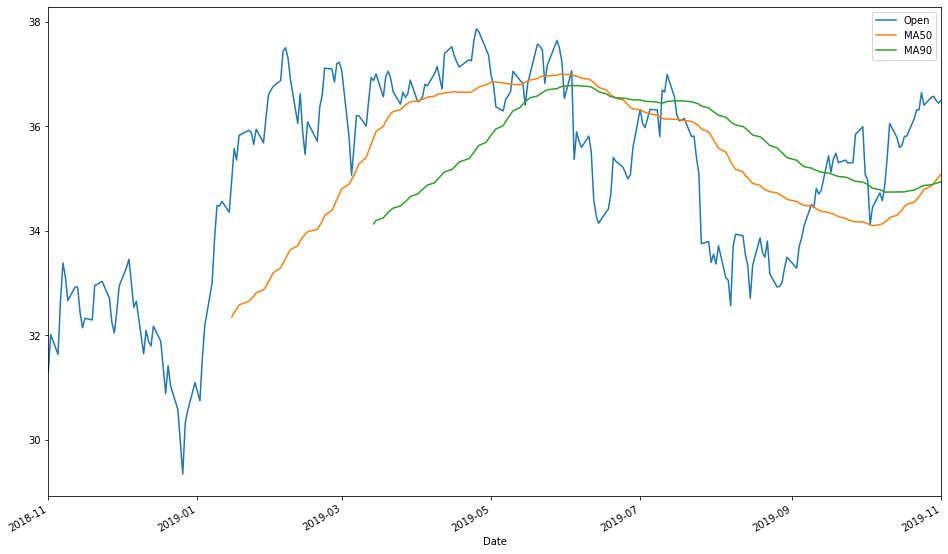

In [166]:
ENB['MA50']= ENB['Open'].rolling(50).mean()
ENB['MA90']= ENB['Open'].rolling(90).mean()
ENB[['Open','MA50','MA90']].plot(figsize=(16,10))

# Relationship between these stocks

In [695]:
from pandas.plotting import scatter_matrix

In [696]:
PF_Open = pd.concat([COF['Open'],GLD['Open'], 
                RY['Open'],AAPL['Open'],
                FFH['Open'],ACB['Open'],
                TTWO['Open'], TEAM['Open'], ENB['Open'] ], axis=1)

In [697]:
PF_Open.columns = ['COF Open', 'GLD Open', 'RY Open', 'AAPL Open', 'FFH Open', 'ACB Open', 'TTWO Open', 'TEAM Open', 'ENB Open']

In [698]:
PF_Close = pd.concat([COF['Close'],GLD['Close'], 
                RY['Close'],AAPL['Close'],
                FFH['Close'],ACB['Close'],
                TTWO['Close'], TEAM['Close'], ENB['Close'] ], axis=1)

In [699]:
PF_Close.columns = ['COF Close', 'GLD Close', 'RY Close', 'AAPL Close', 'FFH Close', 'ACB Close', 'TTWO Close', 'TEAM Close', 'ENB Close'] 

In [700]:
PF_Open.head()

,COF Open,GLD Open,RY Open,AAPL Open,FFH Open,ACB Open,TTWO Open,TEAM Open,ENB Open
Date,,,,,,,,,
2018-11-01,89.309998,116.330002,73.489998,219.050003,641.070007,6.94,129.660004,76.669998,31.290001
2018-11-02,89.300003,116.610001,73.589996,209.550003,627.000000,6.80,128.800003,77.070000,32.009998
2018-11-05,87.690002,116.279999,73.169998,204.300003,615.760010,7.18,128.610001,76.199997,31.629999
2018-11-06,87.849998,116.440002,72.820000,201.919998,620.880005,7.34,125.559998,74.150002,32.650002
2018-11-07,89.739998,116.260002,73.349998,205.970001,630.530029,7.70,126.150002,73.639999,33.380001


In [701]:
PF_Close.head()

,COF Close,GLD Close,RY Close,AAPL Close,FFH Close,ACB Close,TTWO Close,TEAM Close,ENB Close
Date,,,,,,,,,
2018-11-01,89.300003,116.629997,73.209999,222.220001,627.000000,6.73,128.910004,76.750000,31.670000
2018-11-02,87.269997,116.650002,73.019997,207.479996,612.500000,7.02,128.369995,76.480003,31.420000
2018-11-05,88.050003,116.370003,72.970001,201.589996,621.260010,7.35,126.699997,74.610001,32.320000
2018-11-06,89.180000,116.040001,72.809998,203.770004,630.000000,7.40,123.680000,72.089996,33.119999
2018-11-07,90.540001,116.029999,73.199997,209.949997,629.390015,8.08,125.809998,77.610001,33.169998


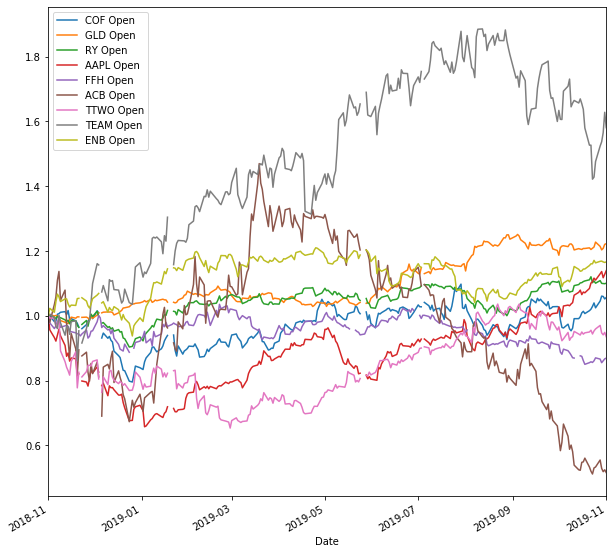

In [519]:
stocks_normalized = PF_Open/PF_Open.iloc[0]
stocks_normalized.plot(figsize=(10,10))

In [520]:
PF_Open.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 257 entries, 2018-11-01 to 2019-11-01
Data columns (total 9 columns):
COF Open     252 non-null float64
GLD Open     252 non-null float64
RY Open      252 non-null float64
AAPL Open    252 non-null float64
FFH Open     252 non-null float64
ACB Open     252 non-null float64
TTWO Open    252 non-null float64
TEAM Open    252 non-null float64
ENB Open     252 non-null float64
dtypes: float64(9)
memory usage: 20.1 KB


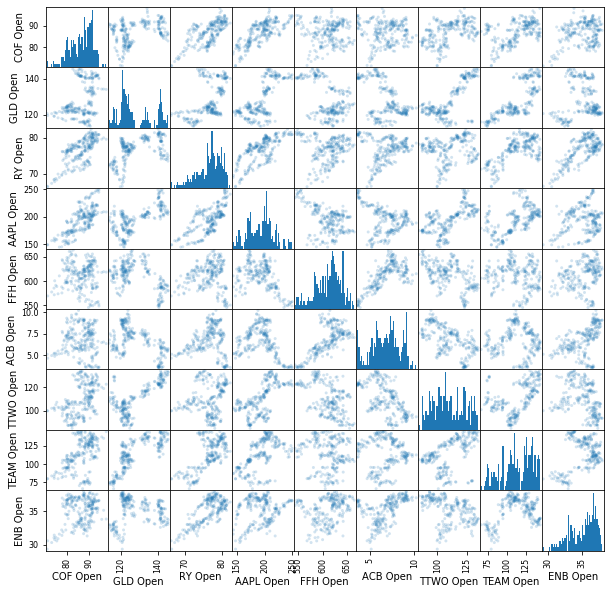

In [521]:
scatter_matrix(PF_Open, figsize=(10,10), alpha=0.2, hist_kwds={'bins':50});

# BASIC FINANCIAL ANALYSIS

## Daily Perc. Change

In [172]:
#Daily perc. change
COF['returns']= COF['Close'].pct_change(1)  # 1 day
GLD['returns']= GLD['Close'].pct_change(1)
RY['returns']= RY['Close'].pct_change(1)
AAPL['returns']= AAPL['Close'].pct_change(1)
FFH['returns']= FFH['Close'].pct_change(1)
ACB['returns']= ACB['Close'].pct_change(1)
TTWO['returns']= TTWO['Close'].pct_change(1)
TEAM['returns']= TEAM['Close'].pct_change(1)
ENB['returns']= ENB['Close'].pct_change(1)

In [173]:
ENB

,High,Low,Open,Close,Volume,Adj Close,Total Traded,MA50,MA90,returns
Date,,,,,,,,,,
2018-11-01,31.700001,31.090000,31.290001,31.670000,4197300.0,28.720997,1.313335e+08,NaN,NaN,NaN
2018-11-02,32.009998,30.950001,32.009998,31.420000,4472500.0,28.494274,1.431647e+08,NaN,NaN,-0.007894
2018-11-05,32.439999,31.420000,31.629999,32.320000,4791000.0,29.310471,1.515393e+08,NaN,NaN,0.028644
2018-11-06,33.180000,32.599998,32.650002,33.119999,7229100.0,30.035978,2.360301e+08,NaN,NaN,0.024752
2018-11-07,33.669998,32.759998,33.380001,33.169998,5172100.0,30.081320,1.726447e+08,NaN,NaN,0.001510
...,...,...,...,...,...,...,...,...,...,...
2019-10-28,36.830002,36.549999,36.549999,36.639999,2933700.0,36.113056,1.072267e+08,34.8524,34.877000,0.004386
2019-10-29,36.630001,36.360001,36.570000,36.430000,2029400.0,35.906078,7.421516e+07,34.9066,34.890778,-0.005731
2019-10-30,36.490002,36.209999,36.490002,36.430000,2031300.0,35.906078,7.412214e+07,34.9648,34.905000,0.000000


# Histogram

In [175]:
Bins= 20

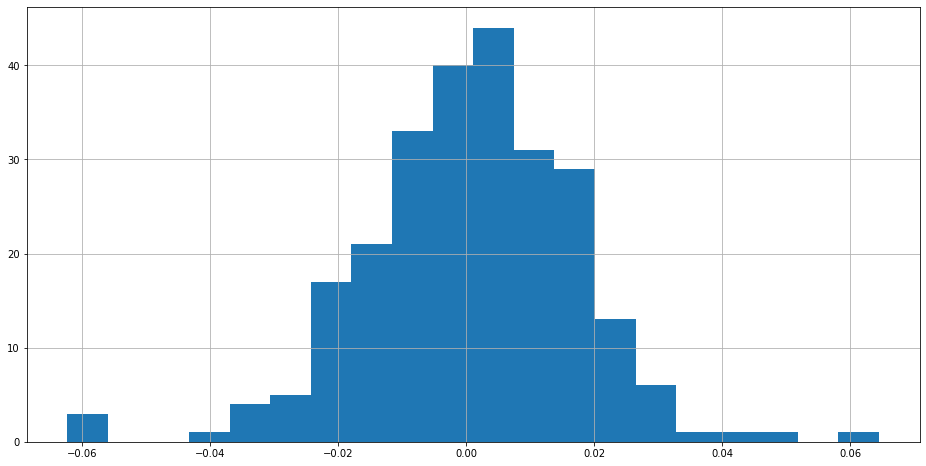

In [176]:
COF['returns'].hist(label='COF', bins=Bins,figsize=(16,8))

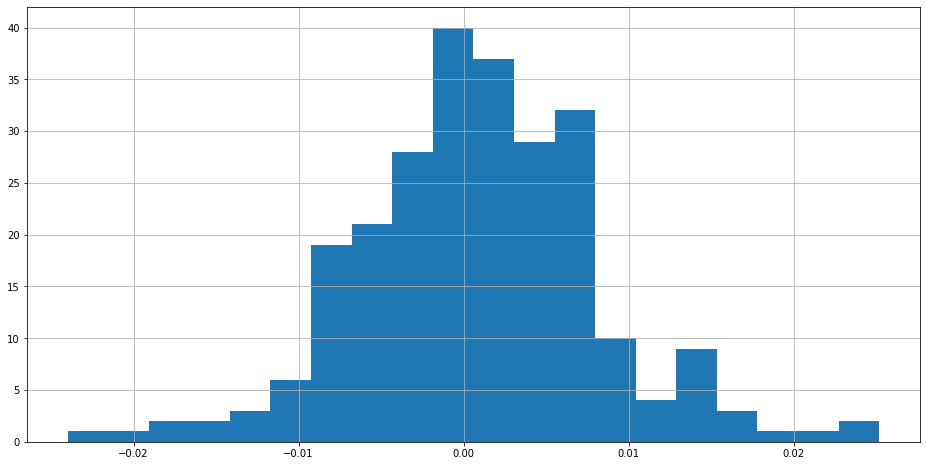

In [178]:
GLD['returns'].hist(label='GLD', bins=Bins,figsize=(16,8))

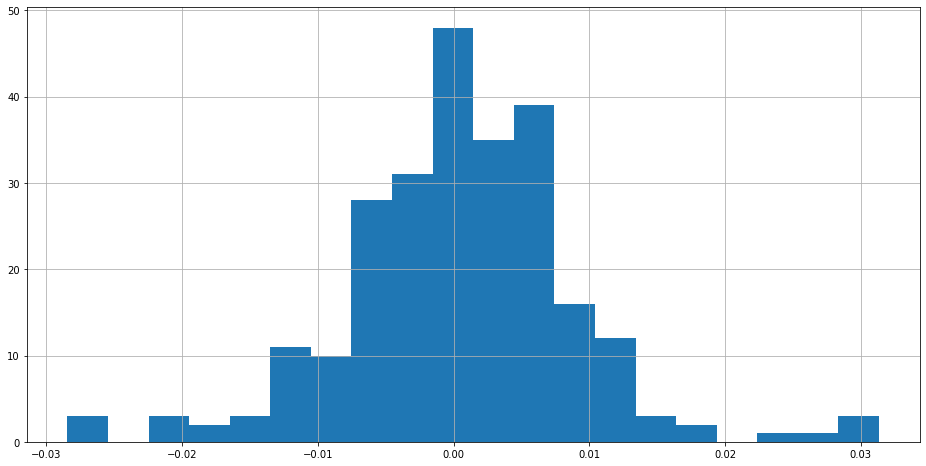

In [179]:
RY['returns'].hist(label='RY', bins=Bins,figsize=(16,8))

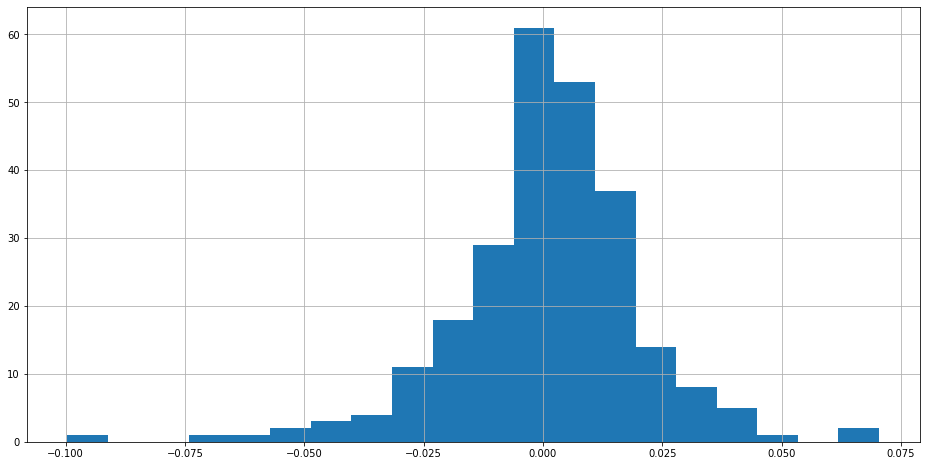

In [180]:
AAPL['returns'].hist(label='AAPL', bins=Bins,figsize=(16,8))

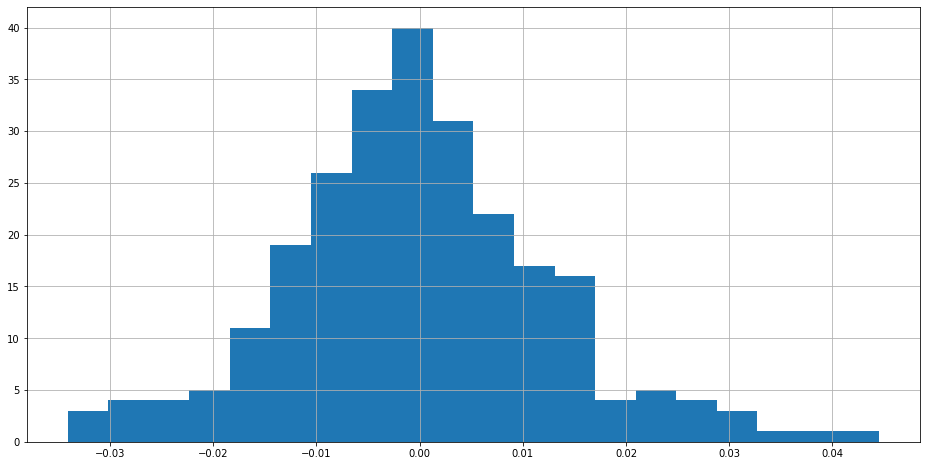

In [181]:
FFH['returns'].hist(label='FFH', bins=Bins,figsize=(16,8))

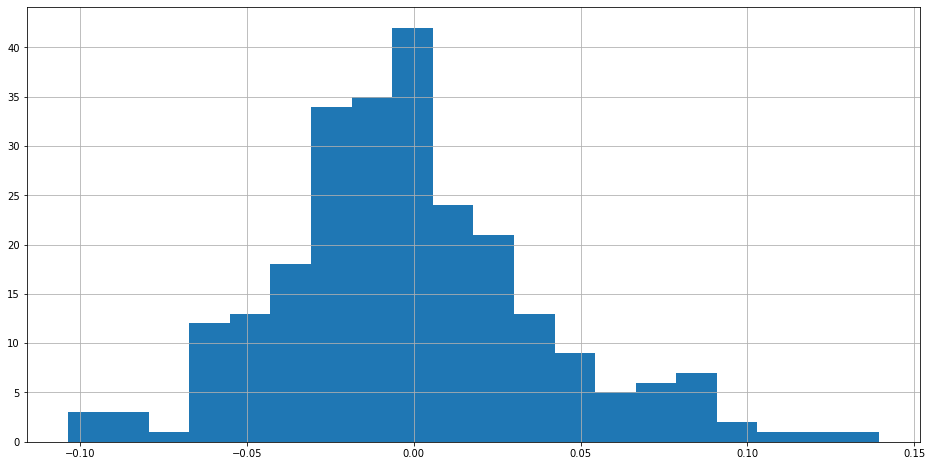

In [182]:
ACB['returns'].hist(label='ACB', bins=Bins,figsize=(16,8))

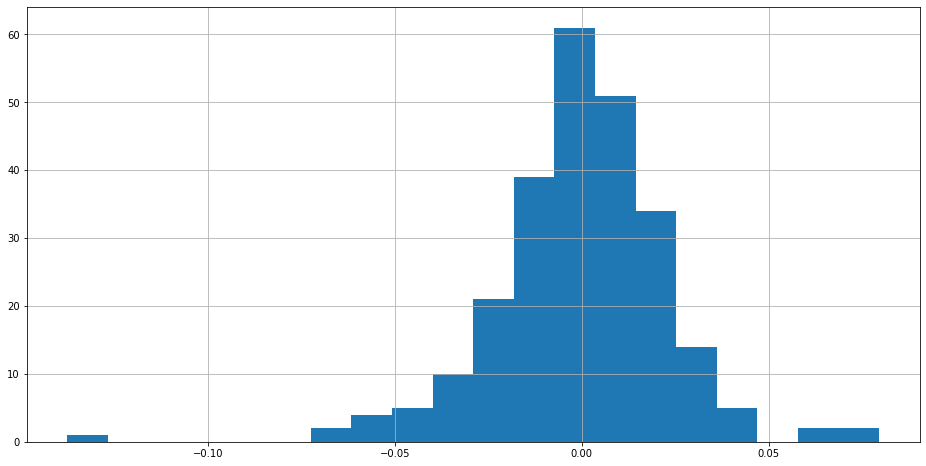

In [183]:
TTWO['returns'].hist(label='TTWO', bins=Bins,figsize=(16,8))

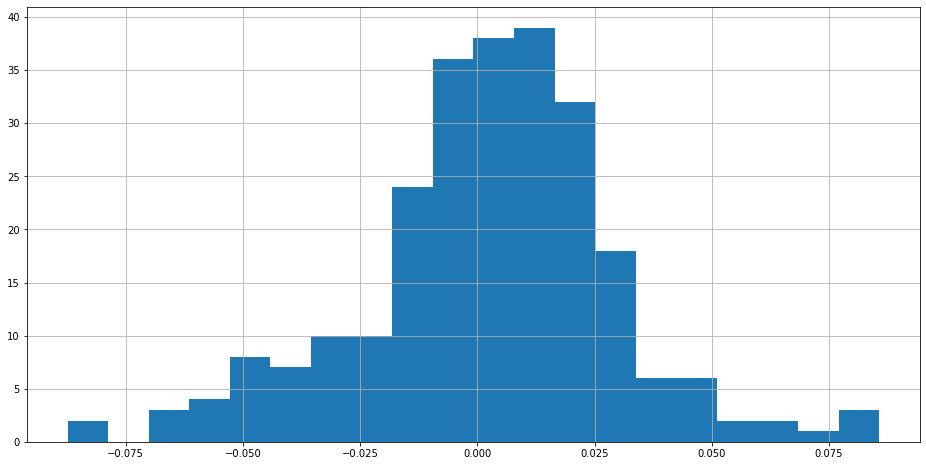

In [184]:
TEAM['returns'].hist(label='TEAM', bins=Bins,figsize=(16,8))

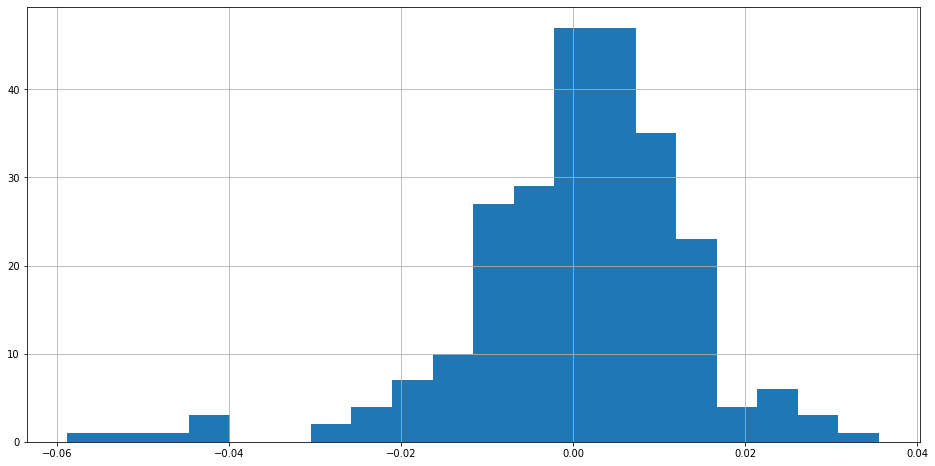

In [185]:
ENB['returns'].hist(label='ENB', bins=Bins,figsize=(16,8))

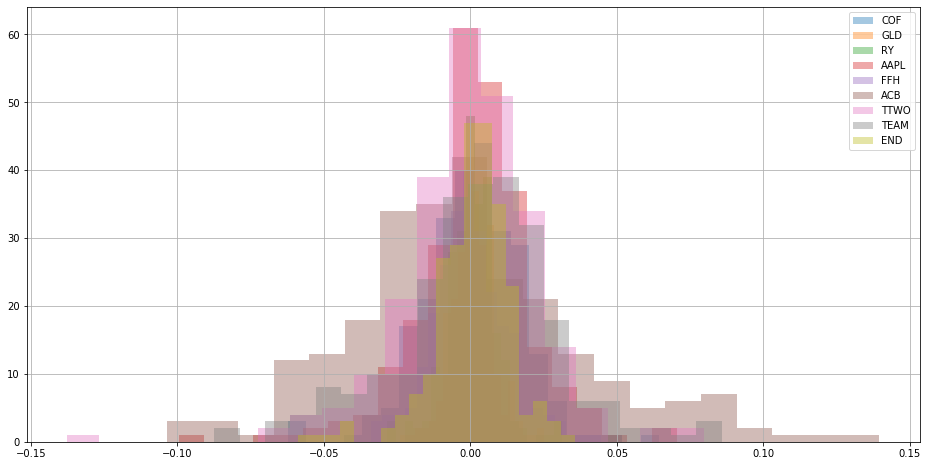

In [191]:
COF['returns'].hist(bins=Bins,label='COF',figsize=(16,8), alpha=0.4)
GLD['returns'].hist( bins=Bins,label='GLD',figsize=(16,8),alpha=0.4)
RY['returns'].hist(bins=Bins,label='RY',figsize=(16,8), alpha=0.4)
AAPL['returns'].hist(bins=Bins,label='AAPL',figsize=(16,8), alpha=0.4)
FFH['returns'].hist(bins=Bins,label='FFH',figsize=(16,8), alpha=0.4)
ACB['returns'].hist(bins=Bins,label='ACB',figsize=(16,8), alpha=0.4)
TTWO['returns'].hist(bins=Bins,label='TTWO',figsize=(16,8), alpha=0.4)
TEAM['returns'].hist(bins=Bins,label='TEAM',figsize=(16,8), alpha=0.4)
ENB['returns'].hist(bins=Bins,label='END',figsize=(16,8), alpha=0.4)

plt.legend();

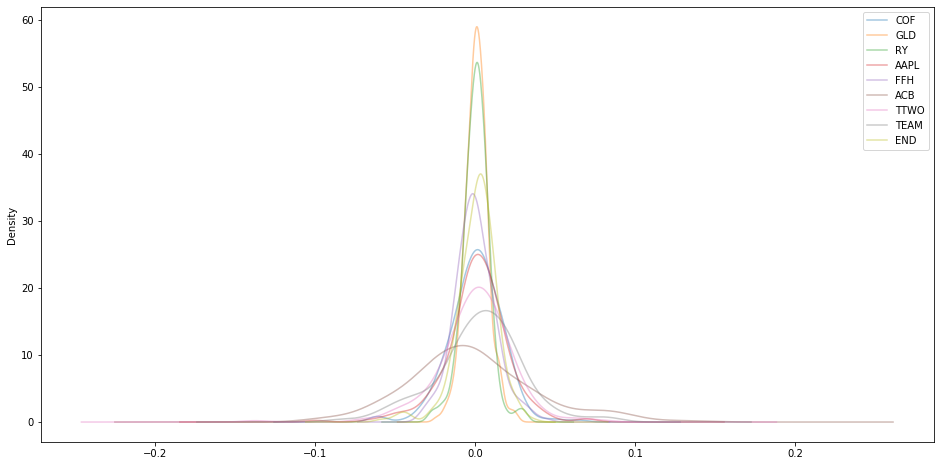

In [192]:
COF['returns'].plot(kind='kde',label='COF',figsize=(16,8), alpha=0.4)
GLD['returns'].plot(kind='kde',label='GLD',figsize=(16,8),alpha=0.4)
RY['returns'].plot(kind='kde',label='RY',figsize=(16,8), alpha=0.4)
AAPL['returns'].plot(kind='kde',label='AAPL',figsize=(16,8), alpha=0.4)
FFH['returns'].plot(kind='kde',label='FFH',figsize=(16,8), alpha=0.4)
ACB['returns'].plot(kind='kde',label='ACB',figsize=(16,8), alpha=0.4)
TTWO['returns'].plot(kind='kde',label='TTWO',figsize=(16,8), alpha=0.4)
TEAM['returns'].plot(kind='kde',label='TEAM',figsize=(16,8), alpha=0.4)
ENB['returns'].plot(kind='kde',label='END',figsize=(16,8), alpha=0.4)

plt.legend();

In [237]:
PF_Return = pd.concat(
[COF['returns'],
GLD['returns'],
RY['returns'],
AAPL['returns'],
FFH['returns'],
ACB['returns'],
TTWO['returns'],
TEAM['returns'],
ENB['returns']
],axis=1)


In [238]:
PF_Return.columns =[
    'COF Return', 
    'GLD Return', 
    'RY Return', 
    'AAPL Return', 
    'FFH Return', 
    'ACB Return', 
    'TTWO Return', 
    'TEAM Return', 
    'ENB Return']

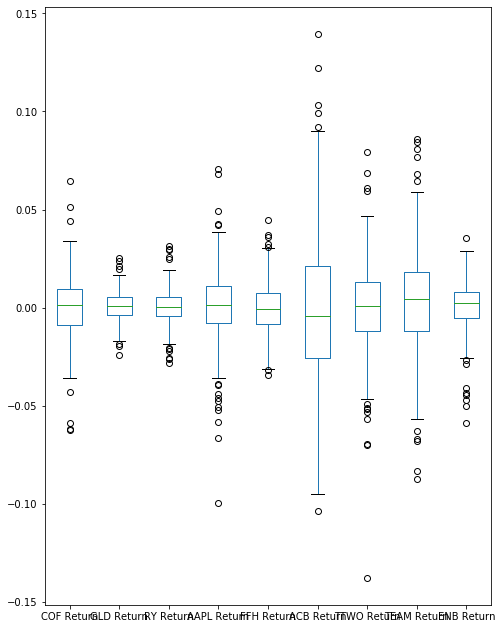

In [239]:
PF_Return.plot(kind='box', figsize=(8,11))

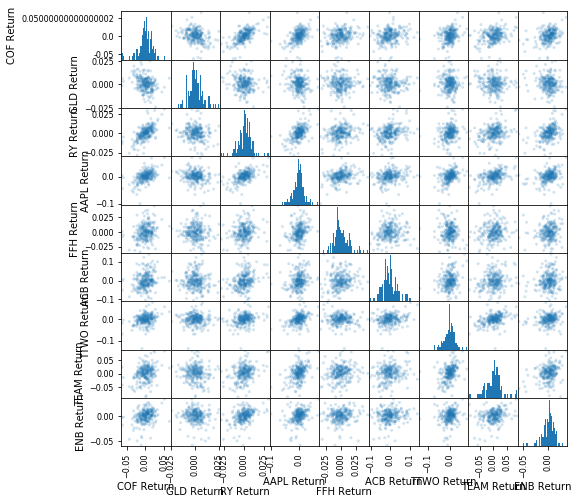

In [240]:
scatter_matrix(PF_Return, figsize=(8,8), alpha=0.2, hist_kwds={'bins':100});

## Cumulative Daily Return

In [204]:
COF['Cumulative Return']= (1+ COF['returns']).cumprod()

In [205]:
GLD['Cumulative Return']= (1+ GLD['returns']).cumprod()

In [206]:
RY['Cumulative Return']= (1+ RY['returns']).cumprod()

In [207]:
AAPL['Cumulative Return']= (1+ AAPL['returns']).cumprod()

In [208]:
FFH['Cumulative Return']= (1+ FFH['returns']).cumprod()

In [209]:
ACB['Cumulative Return']= (1+ ACB['returns']).cumprod()

In [210]:
TTWO['Cumulative Return']= (1+ TTWO['returns']).cumprod()

In [211]:
TEAM['Cumulative Return']= (1+ TEAM['returns']).cumprod()

In [212]:
ENB['Cumulative Return']= (1+ ENB['returns']).cumprod()

In [213]:
ENB

,High,Low,Open,Close,Volume,Adj Close,Total Traded,MA50,MA90,returns,Cumulative Return
Date,,,,,,,,,,,
2018-11-01,31.700001,31.090000,31.290001,31.670000,4197300.0,28.720997,1.313335e+08,NaN,NaN,NaN,NaN
2018-11-02,32.009998,30.950001,32.009998,31.420000,4472500.0,28.494274,1.431647e+08,NaN,NaN,-0.007894,0.992106
2018-11-05,32.439999,31.420000,31.629999,32.320000,4791000.0,29.310471,1.515393e+08,NaN,NaN,0.028644,1.020524
2018-11-06,33.180000,32.599998,32.650002,33.119999,7229100.0,30.035978,2.360301e+08,NaN,NaN,0.024752,1.045785
2018-11-07,33.669998,32.759998,33.380001,33.169998,5172100.0,30.081320,1.726447e+08,NaN,NaN,0.001510,1.047363
...,...,...,...,...,...,...,...,...,...,...,...
2019-10-28,36.830002,36.549999,36.549999,36.639999,2933700.0,36.113056,1.072267e+08,34.8524,34.877000,0.004386,1.156931
2019-10-29,36.630001,36.360001,36.570000,36.430000,2029400.0,35.906078,7.421516e+07,34.9066,34.890778,-0.005731,1.150300
2019-10-30,36.490002,36.209999,36.490002,36.430000,2031300.0,35.906078,7.412214e+07,34.9648,34.905000,0.000000,1.150300


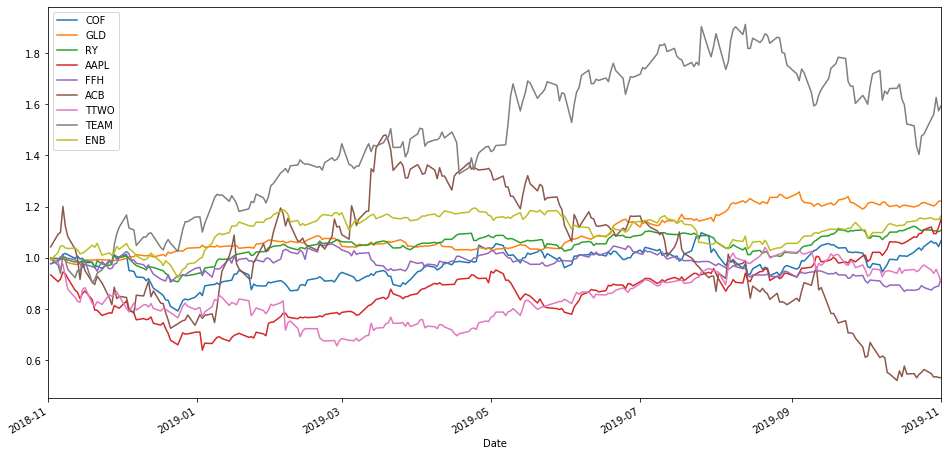

In [214]:
COF['Cumulative Return'].plot(label='COF', figsize=(16,8))
GLD['Cumulative Return'].plot(label='GLD', figsize=(16,8))
RY['Cumulative Return'].plot(label='RY', figsize=(16,8))
AAPL['Cumulative Return'].plot(label='AAPL', figsize=(16,8))
FFH['Cumulative Return'].plot(label='FFH', figsize=(16,8))
ACB['Cumulative Return'].plot(label='ACB', figsize=(16,8))
TTWO['Cumulative Return'].plot(label='TTWO', figsize=(16,8))
TEAM['Cumulative Return'].plot(label='TEAM', figsize=(16,8))
ENB['Cumulative Return'].plot(label='ENB', figsize=(16,8))

plt.legend()

B         business day frequency
C         custom business day frequency (experimental)
D         calendar day frequency
W         weekly frequency
M         month end frequency
SM        semi-month end frequency (15th and end of month)
BM        business month end frequency
CBM       custom business month end frequency
MS        month start frequency
SMS       semi-month start frequency (1st and 15th)
BMS       business month start frequency
CBMS      custom business month start frequency
Q         quarter end frequency
BQ        business quarter endfrequency
QS        quarter start frequency
BQS       business quarter start frequency
A         year end frequency
BA, BY    business year end frequency
AS, YS    year start frequency
BAS, BYS  business year start frequency
BH        business hour frequency
H         hourly frequency
T, min    minutely frequency
S         secondly frequency
L, ms     milliseconds
U, us     microseconds
N         nanoseconds

In [228]:
resample= 'Q'

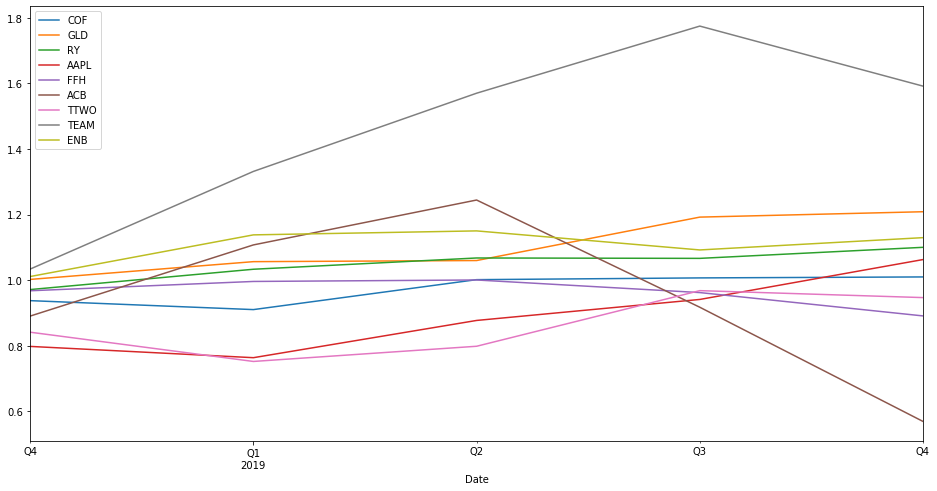

In [230]:
COF['Cumulative Return'].resample(resample).mean().plot(kind='line',label='COF', figsize=(16,8))
GLD['Cumulative Return'].resample(resample).mean().plot(kind='line',label='GLD', figsize=(16,8))
RY['Cumulative Return'].resample(resample).mean().plot(kind='line',label='RY', figsize=(16,8))
AAPL['Cumulative Return'].resample(resample).mean().plot(kind='line',label='AAPL', figsize=(16,8))
FFH['Cumulative Return'].resample(resample).mean().plot(kind='line',label='FFH', figsize=(16,8))
ACB['Cumulative Return'].resample(resample).mean().plot(kind='line',label='ACB', figsize=(16,8))
TTWO['Cumulative Return'].resample(resample).mean().plot(kind='line',label='TTWO', figsize=(16,8))
TEAM['Cumulative Return'].resample(resample).mean().plot(kind='line',label='TEAM', figsize=(16,8))
ENB['Cumulative Return'].resample(resample).mean().plot(kind='line',label='ENB', figsize=(16,8))

plt.legend()

# Portfolio Optimization

In [702]:
PF_Close

,COF Close,GLD Close,RY Close,AAPL Close,FFH Close,ACB Close,TTWO Close,TEAM Close,ENB Close
Date,,,,,,,,,
2018-11-01,89.300003,116.629997,73.209999,222.220001,627.000000,6.73,128.910004,76.750000,31.670000
2018-11-02,87.269997,116.650002,73.019997,207.479996,612.500000,7.02,128.369995,76.480003,31.420000
2018-11-05,88.050003,116.370003,72.970001,201.589996,621.260010,7.35,126.699997,74.610001,32.320000
2018-11-06,89.180000,116.040001,72.809998,203.770004,630.000000,7.40,123.680000,72.089996,33.119999
2018-11-07,90.540001,116.029999,73.199997,209.949997,629.390015,8.08,125.809998,77.610001,33.169998
...,...,...,...,...,...,...,...,...,...
2019-10-28,95.169998,140.639999,81.169998,249.050003,548.159973,3.69,122.779999,118.330002,36.639999
2019-10-29,94.459999,140.250000,80.910004,243.289993,553.750000,3.60,121.089996,119.739998,36.430000
2019-10-30,94.529999,141.020004,80.949997,243.259995,556.500000,3.61,123.129997,124.820000,36.430000


In [703]:
PF_Close.mean()

COF Close      86.757699
GLD Close     128.002063
RY Close       76.634881
AAPL Close    193.713810
FFH Close     611.001113
ACB Close       6.783968
TTWO Close    109.798889
TEAM Close    113.658988
ENB Close      35.099325
dtype: float64

In [704]:
PF_Close.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
COF Close,252.0,86.757699,5.160643,70.779999,82.949997,87.810001,90.665001,98.080002
GLD Close,252.0,128.002063,9.343500,113.660004,121.207499,123.985001,138.059994,146.660004
RY Close,252.0,76.634881,3.392251,66.360001,74.655003,77.264999,79.285000,82.269997
AAPL Close,252.0,193.713810,23.435314,142.190002,174.832497,197.000000,207.912502,255.820007
FFH Close,252.0,611.001113,26.322710,545.030029,594.067520,615.114990,629.542511,665.159973
ACB Close,252.0,6.783968,1.582113,3.510000,5.677500,6.930000,7.875000,9.960000
TTWO Close,252.0,109.798889,12.981199,84.629997,99.862497,108.035000,121.900002,134.210007
TEAM Close,252.0,113.658988,20.533598,69.309998,102.120001,114.155003,130.430000,146.699997
ENB Close,252.0,35.099325,1.874762,29.219999,33.589999,35.615000,36.622499,37.830002


In [705]:
PF_Return.corr()

,COF Return,GLD Return,RY Return,AAPL Return,FFH Return,ACB Return,TTWO Return,TEAM Return,ENB Return
COF Return,1.000000,-0.301128,0.631283,0.504803,0.243016,0.218131,0.299266,0.305259,0.321711
GLD Return,-0.301128,1.000000,-0.128296,-0.186466,-0.028958,-0.061329,0.004988,-0.091680,-0.109632
RY Return,0.631283,-0.128296,1.000000,0.536497,0.219271,0.311375,0.247438,0.326823,0.421170
AAPL Return,0.504803,-0.186466,0.536497,1.000000,0.291080,0.212744,0.384340,0.430222,0.313139
FFH Return,0.243016,-0.028958,0.219271,0.291080,1.000000,0.108054,-0.096185,0.146473,0.111138
ACB Return,0.218131,-0.061329,0.311375,0.212744,0.108054,1.000000,0.221639,0.176182,0.152156
TTWO Return,0.299266,0.004988,0.247438,0.384340,-0.096185,0.221639,1.000000,0.400323,0.174254
TEAM Return,0.305259,-0.091680,0.326823,0.430222,0.146473,0.176182,0.400323,1.000000,0.283608
ENB Return,0.321711,-0.109632,0.421170,0.313139,0.111138,0.152156,0.174254,0.283608,1.000000


# Log Return Calculation

In [706]:
log_ret = np.log(PF_Close/PF_Close.shift(1))
log_ret.head()

,COF Close,GLD Close,RY Close,AAPL Close,FFH Close,ACB Close,TTWO Close,TEAM Close,ENB Close
Date,,,,,,,,,
2018-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-11-02,-0.022995,0.000172,-0.002599,-0.068633,-0.023398,0.042188,-0.004198,-0.003524,-0.007925
2018-11-05,0.008898,-0.002403,-0.000685,-0.028799,0.014201,0.045937,-0.013095,-0.024755,0.028242
2018-11-06,0.012752,-0.002840,-0.002195,0.010756,0.013970,0.006780,-0.024124,-0.034359,0.024451
2018-11-07,0.015135,-0.000086,0.005342,0.029877,-0.000969,0.087912,0.017075,0.073781,0.001509


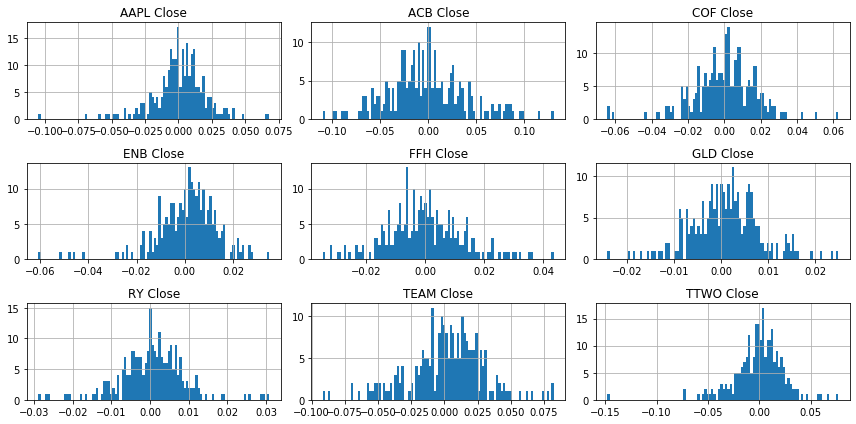

In [707]:
log_ret.hist(bins=100,figsize=(12,6));
plt.tight_layout()

In [708]:
log_ret.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
COF Close,246.0,0.000501,0.016855,-0.064379,-0.008523,0.001275,0.009889,0.062513
GLD Close,246.0,0.000865,0.007334,-0.024294,-0.003439,0.000907,0.005552,0.024866
RY Close,246.0,0.000528,0.008489,-0.028860,-0.004165,0.000620,0.005287,0.030863
AAPL Close,246.0,0.000835,0.019981,-0.104924,-0.007611,0.001691,0.011265,0.068053
FFH Close,246.0,-0.000222,0.012765,-0.034699,-0.008041,-0.000887,0.007631,0.043568
ACB Close,246.0,-0.002130,0.039830,-0.109462,-0.025739,-0.004037,0.021954,0.130543
TTWO Close,246.0,-0.000517,0.023846,-0.148003,-0.012046,0.001007,0.012886,0.076557
TEAM Close,246.0,0.001810,0.027804,-0.091486,-0.012512,0.004051,0.018888,0.082242
ENB Close,246.0,0.000897,0.012725,-0.060591,-0.005381,0.002216,0.008447,0.034973


# Annualize Log Return

In [709]:
log_ret.mean() * 252

COF Close     0.126347
GLD Close     0.218104
RY Close      0.133117
AAPL Close    0.210483
FFH Close    -0.055916
ACB Close    -0.536708
TTWO Close   -0.130273
TEAM Close    0.456141
ENB Close     0.225920
dtype: float64

# Pairwise Covariance

In [710]:
log_ret.cov()

,COF Close,GLD Close,RY Close,AAPL Close,FFH Close,ACB Close,TTWO Close,TEAM Close,ENB Close
COF Close,0.000284,-3.837244e-05,0.000092,0.000169,5.503718e-05,0.000145,0.000122,0.000144,0.000069
GLD Close,-0.000038,5.378945e-05,-0.000008,-0.000028,-7.563091e-07,-0.000019,0.000001,-0.000019,-0.000011
RY Close,0.000092,-8.497608e-06,0.000072,0.000091,2.609825e-05,0.000106,0.000054,0.000078,0.000044
AAPL Close,0.000169,-2.792537e-05,0.000091,0.000399,7.753704e-05,0.000164,0.000184,0.000242,0.000075
FFH Close,0.000055,-7.563091e-07,0.000026,0.000078,1.629518e-04,0.000070,-0.000022,0.000055,0.000021
ACB Close,0.000145,-1.924031e-05,0.000106,0.000164,6.964072e-05,0.001586,0.000207,0.000201,0.000072
TTWO Close,0.000122,1.191634e-06,0.000054,0.000184,-2.174605e-05,0.000207,0.000569,0.000269,0.000055
TEAM Close,0.000144,-1.896117e-05,0.000078,0.000242,5.452919e-05,0.000201,0.000269,0.000773,0.000105
ENB Close,0.000069,-1.067245e-05,0.000044,0.000075,2.054844e-05,0.000072,0.000055,0.000105,0.000162


In [711]:
log_ret.cov()*252

,COF Close,GLD Close,RY Close,AAPL Close,FFH Close,ACB Close,TTWO Close,TEAM Close,ENB Close
COF Close,0.071595,-0.009670,0.023125,0.042489,0.013869,0.036438,0.030658,0.036223,0.017296
GLD Close,-0.009670,0.013555,-0.002141,-0.007037,-0.000191,-0.004849,0.000300,-0.004778,-0.002689
RY Close,0.023125,-0.002141,0.018161,0.022954,0.006577,0.026657,0.013711,0.019583,0.011143
AAPL Close,0.042489,-0.007037,0.022954,0.100606,0.019539,0.041275,0.046468,0.061002,0.018814
FFH Close,0.013869,-0.000191,0.006577,0.019539,0.041064,0.017549,-0.005480,0.013741,0.005178
ACB Close,0.036438,-0.004849,0.026657,0.041275,0.017549,0.399786,0.052226,0.050652,0.018087
TTWO Close,0.030658,0.000300,0.013711,0.046468,-0.005480,0.052226,0.143293,0.067715,0.013749
TEAM Close,0.036223,-0.004778,0.019583,0.061002,0.013741,0.050652,0.067715,0.194816,0.026483
ENB Close,0.017296,-0.002689,0.011143,0.018814,0.005178,0.018087,0.013749,0.026483,0.040806


## My Portfolio

In [470]:
# Set seed (optional)
#np.random.seed(101)

# Stock Columns
print('My Holdings')
print(PF_Close.columns)
print('\n')

# My Portfolio Weights
print('My Portfolio Weights')
#holdings in thousands
#COF | GLD |RY |AAPL| FFH | ACB |TTWO |TEAM |ENB    
my_weights = np.array([15,6,5,1.5,6,5,6,5,4])
print(my_weights)
print('\n')
 


# Rebalance Weights
print('Rebalance to sum to 1.0')
my_weights = my_weights / np.sum(my_weights)
print(my_weights)
print('\n')

# Expected Return
print('Expected Portfolio Return')
my_exp_ret = np.sum(log_ret.mean() * my_weights) *252
print(my_exp_ret)
print('\n')

# Expected Variance
print('Expected Volatility')
my_exp_vol = np.sqrt(np.dot(my_weights.T, np.dot(log_ret.cov() * 252, my_weights)))
print(my_exp_vol)
print('\n')

# Sharpe Ratio  ASSUMES RF of 0 , subtract 2% if want to be more accurate
my_SR = my_exp_ret/my_exp_vol
print('Sharpe Ratio')
print(my_SR)



My Holdings
Index(['COF Close', 'GLD Close', 'RY Close', 'AAPL Close', 'FFH Close',
       'ACB Close', 'TTWO Close', 'TEAM Close', 'ENB Close'],
      dtype='object')


My Portfolio Weights
[15.   6.   5.   1.5  6.   5.   6.   5.   4. ]


Rebalance to sum to 1.0
[0.28037383 0.11214953 0.09345794 0.02803738 0.11214953 0.09345794
 0.11214953 0.09345794 0.07476636]


Expected Portfolio Return
0.06670732561898833


Expected Volatility
0.17159474869512742


Sharpe Ratio
0.38874922528956474


## Run Monte-Carlo Simulation for Risk Return 

In [713]:
# Set seed (optional)
#np.random.seed(101)

num_ports = 100000

all_weights = np.zeros((num_ports,len(PF_Close.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):

    # Create Random Weights
    weights = np.array(np.random.random(9))

    # Rebalance Weights
    weights = weights/np.sum(weights)
    
    # Save Weights
    all_weights[ind,:] = weights

    # Expected Return
    ret_arr[ind] = np.sum( (log_ret.mean() * weights *252)) # daily

    # Expected Variance
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))

    # Sharpe Ratio
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]

In [716]:
##HIGHEST SHARPE RATIO PORTFOLIO

In [717]:
print('Max sharpe ratio is the array:{}'.format(sharpe_arr.max()))
print('Its location in the array:{}'.format(sharpe_arr.argmax()))

Max sharpe ratio is the array:1.8742887571190685
Its location in the array:65084


In [718]:
sharpe_arr.argmax()

65084

In [740]:
sharpe_arr[65084]

1.8742887571190685

In [719]:
all_weights[65084,:]

array([1.02919705e-01, 4.07486090e-01, 2.04877047e-01, 5.20787359e-02,
       7.46846585e-02, 3.87520477e-04, 7.13137917e-03, 1.09311234e-01,
       4.11236299e-02])

In [541]:
##MY WEIGHTS
0.28037383 0.11214953 0.09345794 0.02803738 0.11214953 0.09345794
 0.11214953 0.09345794 0.07476636]

SyntaxError: invalid syntax (<ipython-input-541-26dd998b5759>, line 2)

In [720]:
max_sr_ret = ret_arr[65084]
print(max_sr_ret)

0.19395108257224739


In [721]:
max_sr_vol = vol_arr[65084]
print(max_sr_vol)

0.10347983032794034


# PLOT PORTFOLIO RISK AND RETURN 

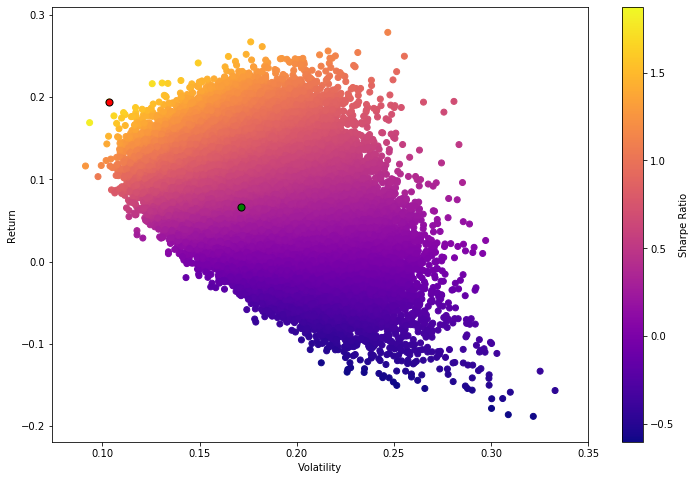

In [722]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')


# Add red dot for max SR
plt.scatter(max_sr_vol,max_sr_ret,c='red',s=50,edgecolors='black')

#Add my portfolio
plt.scatter(my_exp_vol,my_exp_ret,label= 'my pf',c='green',s=50,edgecolors='black')

# Mathematically Optimize Portfolio

In [723]:
def get_ret_vol_sr(weights):
    """
    Takes in weights, returns array or return,volatility, sharpe ratio
    """
    weights = np.array(weights)
    ret = np.sum(log_ret.mean() * weights)*252
    vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov()*252, weights)))
    sr = ret/vol
    return np.array([ret,vol,sr])

In [724]:
from scipy.optimize import minimize

In [726]:
def neg_sharpe(weights):
    return  get_ret_vol_sr(weights)[2] * -1

In [727]:
# Contraints
def check_sum(weights):
    '''
    Returns 0 if sum of weights is 1.0
    '''
    return np.sum(weights) - 1

In [728]:
# By convention of minimize function it should be a function that returns zero for conditions
cons = ({'type':'eq','fun': check_sum})

In [729]:
# 0-1 bounds for each weight
bounds = ((0, 1), (0, 1), (0, 1), (0, 1),(0, 1), (0, 1), (0, 1), (0, 1), (0, 1))

In [730]:
# Initial Guess (equal distribution)
init_guess = [0.1,0.1,0.1,0.2,0.1,0.1,0.1,0.1,0.1]

In [731]:
# Sequential Least SQuares Programming (SLSQP).
opt_results = minimize(neg_sharpe,init_guess,method='SLSQP',bounds=bounds,constraints=cons)

In [732]:
opt_results

     fun: -2.5480899766779137
     jac: array([ 3.62485647e-03,  1.86145306e-04, -5.74946404e-04,  3.12328339e-05,
        1.66035408e+00,  8.71246088e+00,  4.68079022e+00, -1.86127424e-03,
       -8.29547644e-04])
 message: 'Optimization terminated successfully.'
    nfev: 160
     nit: 14
    njev: 14
  status: 0
 success: True
       x: array([4.22858642e-02, 6.42792615e-01, 1.06877715e-01, 1.52345136e-02,
       0.00000000e+00, 4.44062511e-14, 1.56922001e-14, 5.20550872e-02,
       1.40754205e-01])

In [733]:
get_ret_vol_sr(opt_results.x)

array([0.21851585, 0.08575672, 2.54808998])

In [734]:
np.round(opt_results.x,decimals=3)

array([0.042, 0.643, 0.107, 0.015, 0.   , 0.   , 0.   , 0.052, 0.141])

In [735]:
get_ret_vol_sr(opt_results.x)

array([0.21851585, 0.08575672, 2.54808998])

# Optimal Portfolios (Efficient Frontier)

In [736]:
# Our returns go from 0 to somewhere along 0.3
# Create a linspace number of points to calculate x on
frontier_y = np.linspace(0,0.5,1000) # Change 100 to a lower number for slower computers!

In [737]:
def minimize_volatility(weights):
    return  get_ret_vol_sr(weights)[1] 

In [738]:
frontier_volatility = []

for possible_return in frontier_y:
    # function for return
    cons = ({'type':'eq','fun': check_sum},  # all sums equal zero
            {'type':'eq','fun': lambda w: get_ret_vol_sr(w)[0] - possible_return}) # sum weights , get returns, and subtract possible return 
    
    result = minimize(minimize_volatility,init_guess,method='SLSQP',bounds=bounds,constraints=cons)
    
    frontier_volatility.append(result['fun'])

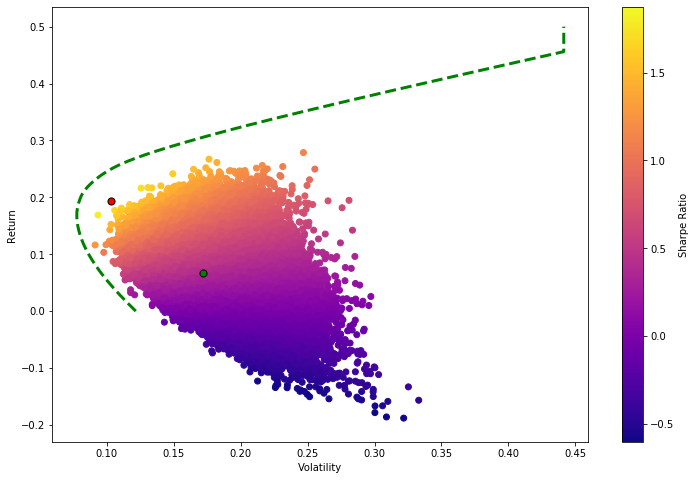

In [739]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')


# Add frontier line
plt.plot(frontier_volatility,frontier_y,'g--',linewidth=3)

# Add red dot for max SR
plt.scatter(max_sr_vol,max_sr_ret,c='red',s=50,edgecolors='black')

#Add my portfolio
plt.scatter(my_exp_vol,my_exp_ret,label= 'my pf',c='green',s=50,edgecolors='black')


# CREATE TABLE WITH STOCKS , MY WEIGHTS, OPTIMAL WEIGHTS, EXPECTED RETURN, AND EXPECTED VARIANCE 

# Portfolio Value